## Iris Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.shape

(150, 4)

In [12]:
df["label"] = iris["target"]

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [17]:
print(df.label.value_counts())

2    50
1    50
0    50
Name: label, dtype: int64


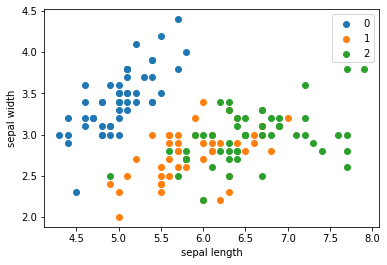

In [21]:
plt.scatter(df[:50]["sepal length"], df[:50]["sepal width"], label="0")
plt.scatter(df[50:100]["sepal length"], df[50:100]["sepal width"], label="1")
plt.scatter(df[100:]["sepal length"], df[100:]["sepal width"], label="2")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

In [ ]:
data = np.array(df.loc[:100])

### 二分类：只对label=0/1的数据做分类

In [28]:
data = np.array(df.iloc[:100, [0, 1, -1]])
print(data.shape)

(100, 3)


In [30]:
X, y = data[:,:-1], data[:,-1]
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [32]:
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [33]:
# 把0转换为-1
y = np.array([1 if i == 1 else -1 for i in y])
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


## Perceptron

In [34]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
        # self.data = data
    
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate*np.dot(y, X)
                    self.b = self.b + self.l_rate*y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'
        
    def score(self):
        pass

In [35]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

In [41]:
print("w: ", perceptron.w)
print("b: ", perceptron.b)

w:  [  7.8 -10. ]
b:  -12.099999999999973


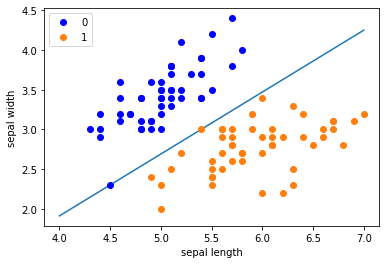

In [56]:
# 4-7等差分布10个数
x_points = np.linspace(4, 7,10)
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
# 画出超平面
plt.plot(x_points, y_)

# 画出散点图
plt.plot(data[:50, 0], data[:50, 1], "bo", label="0")
plt.plot(data[50:100, 0], data[50:100, 1], "o", label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

## Sklearn

In [89]:
from sklearn.linear_model import Perceptron

In [90]:
clf = Perceptron(fit_intercept=False, max_iter=1000, shuffle=False)
clf.fit(X, y)

Perceptron(fit_intercept=False, shuffle=False)

In [91]:
# coef represents for weights, intercept represents for bias
print("coef: ", clf.coef_)
print("intercept: ", clf.intercept_)

coef:  [[ 16.3 -24.2]]
intercept:  [0.]


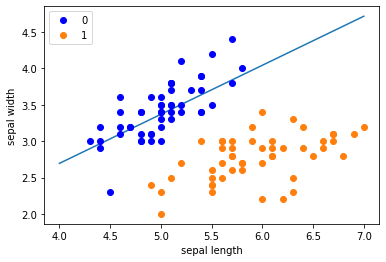

In [84]:
# 画出超平面
x__ = np.arange(4, 8)
y__ = -(clf.coef_[0][0] * x__ + clf.intercept_) / clf.coef_[0][1]
plt.plot(x__, y__)

# 画出散点图
plt.plot(data[:50, 0], data[:50, 1], "bo", label="0")
plt.plot(data[50:100, 0], data[50:100, 1], "o", label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()